<a href="https://colab.research.google.com/github/Osama-Shkokani/Git_cours/blob/master/Supermarket_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# 1. تحميل البيانات
df = pd.read_csv('SuperMarket Analysis.csv')

# عرض أول 5 أسطر
print("--- HEAD (أول 5 أسطر) ---")
print(df.head())

# معلومات الملف
print("\n--- INFO (معلومات الأعمدة) ---")
print(df.info())

# إحصائيات عامة
print("\n--- DESCRIBE (إحصائيات) ---")
print(df.describe())

# 2. تنظيف البيانات
# فحص القيم المفقودة
print("\n--- Missing Values (القيم الناقصة) ---")
print(df.isnull().sum())

# تصحيح التاريخ
df['Date'] = pd.to_datetime(df['Date'])
print("\nتم تحويل عمود التاريخ بنجاح ✅")

--- HEAD (أول 5 أسطر) ---
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905

--- Basic Statistics (Mean, Median, Min, Max) ---
              Sales  Quantity  gross income   Rating
mean     322.966749      5.51     15.379369   6.9727
median   253.848000      5.00     12.088000   7.0000
min       10.678500      1.00      0.508500   4.0000
max     1042.650000     10.00     49.650000  10.0000


/tmp/ipython-input-136311577.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x='Branch', data=df, palette='viridis')
/tmp/ipython-input-136311577.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], x='Customer type', data=df, palette='pastel')
/tmp/ipython-input-136311577.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1, 0], x='Gender', data=df, palette='coolwarm')
/tmp/ipython-input-136311577.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

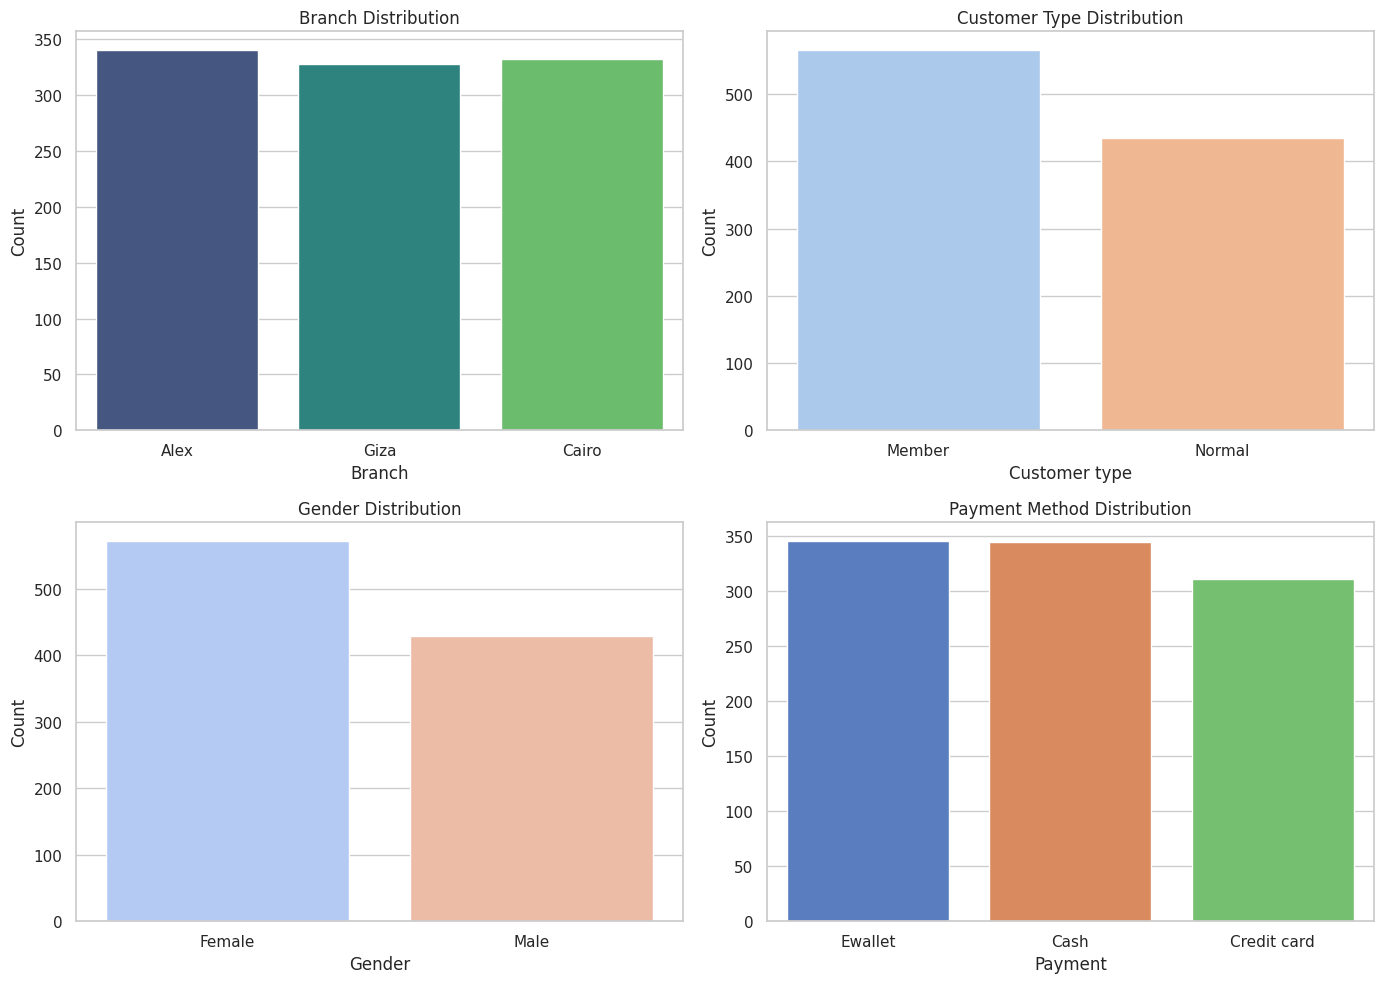

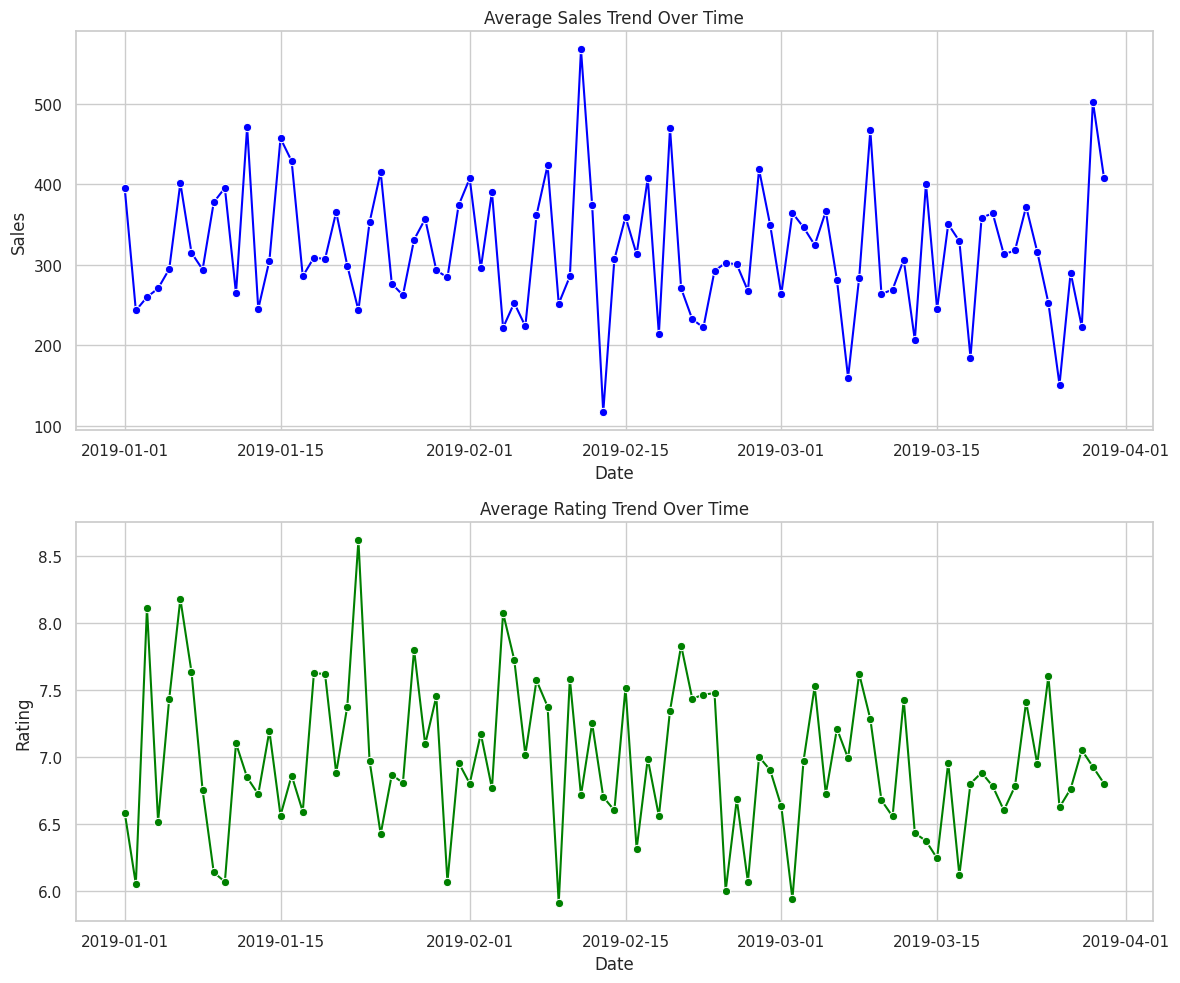

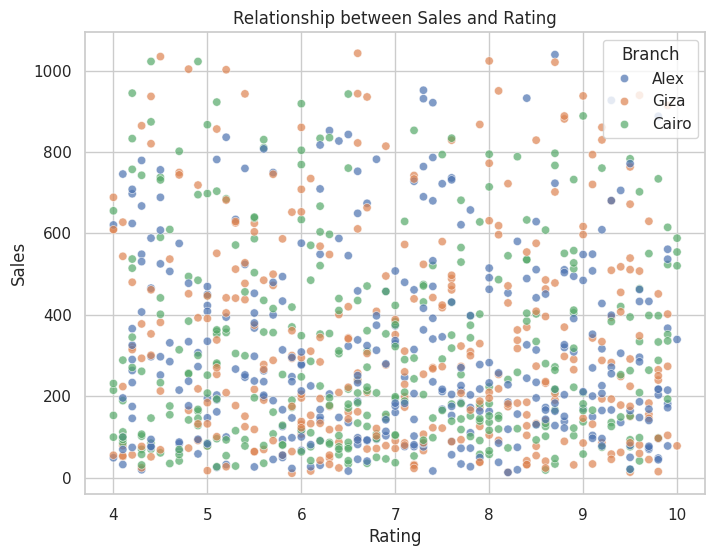

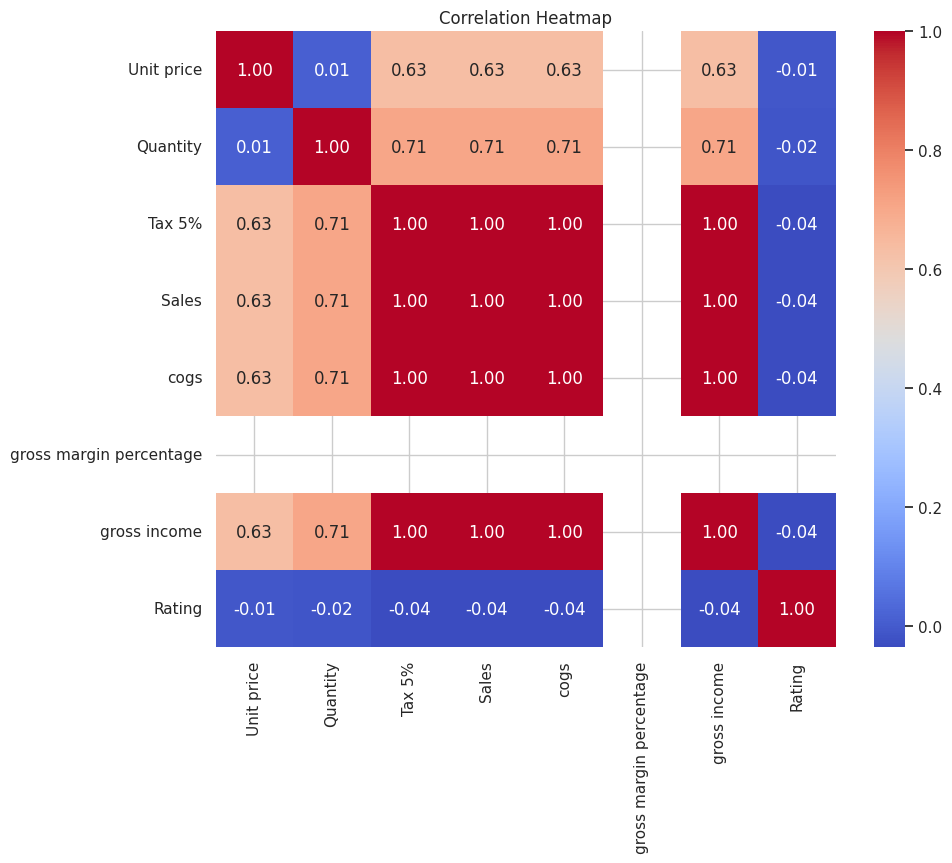

/tmp/ipython-input-136311577.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product line', y='gross income', data=df, palette='Set2')


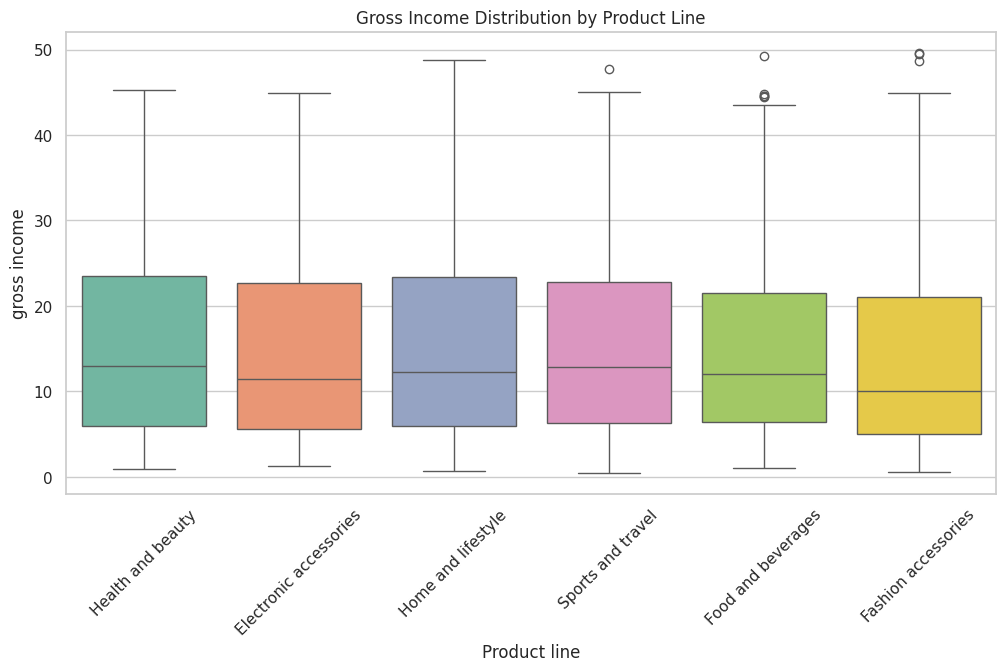

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# تظبيط الستايل
sns.set(style="whitegrid")

# --- الجزء الأول: الإحصائيات (Basic Statistics) ---
print("--- Basic Statistics (Mean, Median, Min, Max) ---")
# نختار الأعمدة الرقمية المهمة
cols = ['Sales', 'Quantity', 'gross income', 'Rating']
stats = df[cols].agg(['mean', 'median', 'min', 'max'])
print(stats)

# --- الجزء الثاني: الرسومات (Visualizations) ---

# 1. Bar Charts for Categorical Data (Branch, Customer, Gender, Payment)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Branch Distribution
sns.countplot(ax=axes[0, 0], x='Branch', data=df, palette='viridis')
axes[0, 0].set_title('Branch Distribution')
axes[0, 0].set_ylabel('Count')

# Customer Type Distribution
sns.countplot(ax=axes[0, 1], x='Customer type', data=df, palette='pastel')
axes[0, 1].set_title('Customer Type Distribution')
axes[0, 1].set_ylabel('Count')

# Gender Distribution
sns.countplot(ax=axes[1, 0], x='Gender', data=df, palette='coolwarm')
axes[1, 0].set_title('Gender Distribution')
axes[1, 0].set_ylabel('Count')

# Payment Method Distribution
sns.countplot(ax=axes[1, 1], x='Payment', data=df, palette='muted')
axes[1, 1].set_title('Payment Method Distribution')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# 2. Time Series Analysis (Sales & Rating over time)
# تجهيز البيانات
daily_data = df.groupby('Date')[['Sales', 'Rating']].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Sales Trend
sns.lineplot(ax=axes[0], x='Date', y='Sales', data=daily_data, color='blue', marker='o')
axes[0].set_title('Average Sales Trend Over Time')

# Rating Trend
sns.lineplot(ax=axes[1], x='Date', y='Rating', data=daily_data, color='green', marker='o')
axes[1].set_title('Average Rating Trend Over Time')

plt.tight_layout()
plt.show()

# 3. Scatter Plot (Sales vs Rating)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Sales', data=df, hue='Branch', alpha=0.7)
plt.title('Relationship between Sales and Rating')
plt.show()

# 4. Correlation Heatmap
# بنختار بس الأعمدة الرقمية
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 5. Box Plot (Gross Income by Product Line)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product line', y='gross income', data=df, palette='Set2')
plt.title('Gross Income Distribution by Product Line')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# --- SECTION 4 & 6: Sales Analysis & Advanced Questions ---

print("--- Sales & Revenue Analysis Results ---")

# 1. تحليل الفروع (Total Revenue by Branch)
# عشان نعرف أي فرع بيجيب فلوس أكثر (Q1)
branch_sales = df.groupby('Branch')['Sales'].sum().sort_values(ascending=False)
print("\n1. Total Sales by Branch (Q1 Answer):")
print(branch_sales)
print(f"-> The highest revenue branch is: {branch_sales.idxmax()}")

# 2. تحليل الزبائن (Member vs Normal Spending)
# عشان نعرف مين بيصرف أكثر (Q2)
customer_spending = df.groupby('Customer type')['Sales'].mean()
print("\n2. Average Spending by Customer Type (Q2 Answer):")
print(customer_spending)

# 3. تحليل الدفع (Payment Usage)
# عشان نعرف أكثر طريقة دفع مستخدمة (Q3)
payment_usage = df['Payment'].value_counts()
print("\n3. Most Used Payment Methods (Q3 Answer):")
print(payment_usage)
print(f"-> The most used payment method is: {payment_usage.idxmax()}")

# 4. تحليل المنتجات (Rating by Product Line)
# عشان نعرف أي بضاعة الناس مبسوطة منها أكثر (Q4)
product_rating = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)
print("\n4. Average Rating by Product Line (Q4 Answer):")
print(product_rating)
print(f"-> Highest Rated Product Line is: {product_rating.idxmax()}")

# 5. العلاقة بين السعر والكمية (Price vs Quantity Correlation)
# هل إذا السعر غالي الناس بتشتري كمية أقل؟ (Q5)
correlation = df['Unit price'].corr(df['Quantity'])
print("\n5. Correlation between Price and Quantity (Q5 Answer):")
print(f"Correlation Coefficient: {correlation:.4f}")
if abs(correlation) < 0.1:
    print("-> Result: No significant relationship (Weak correlation).")
else:
    print("-> Result: There is a relationship.")

--- Sales & Revenue Analysis Results ---

1. Total Sales by Branch (Q1 Answer):
Branch
Giza     110568.7065
Alex     106200.3705
Cairo    106197.6720
Name: Sales, dtype: float64
-> The highest revenue branch is: Giza

2. Average Spending by Customer Type (Q2 Answer):
Customer type
Member    335.742945
Normal    306.372379
Name: Sales, dtype: float64

3. Most Used Payment Methods (Q3 Answer):
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64
-> The most used payment method is: Ewallet

4. Average Rating by Product Line (Q4 Answer):
Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64
-> Highest Rated Product Line is: Food and beverages

5. Correlation between Price and Quantity (Q5 Answer):
Correlation Coefficient: 0.0108
-> Result: No significant rel